In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.fft import * # a library for carrying out Fourier Transforms
from scipy import signal # further FFT functionality
%matplotlib notebook

In [46]:
input_df = pd.read_csv("../Data/Specimen_Event.csv", index_col="Seconds")

In [47]:
input_df

,Amplitude
Seconds,
0.00,276.56610
0.01,217.99040
0.02,121.53820
0.03,30.84963
0.04,-12.85576
...,...
299.96,-165.62300
299.97,-178.16350
299.98,-169.86290


<IPython.core.display.Javascript object>


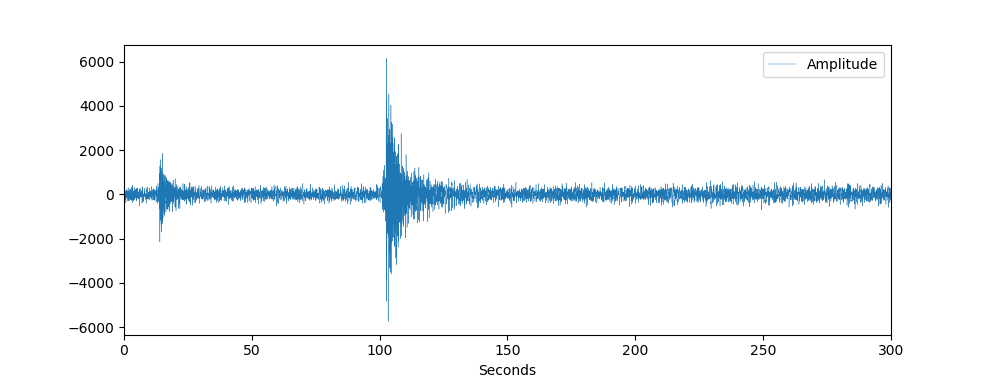

In [48]:
input_df.plot(lw = 0.3)

<IPython.core.display.Javascript object>


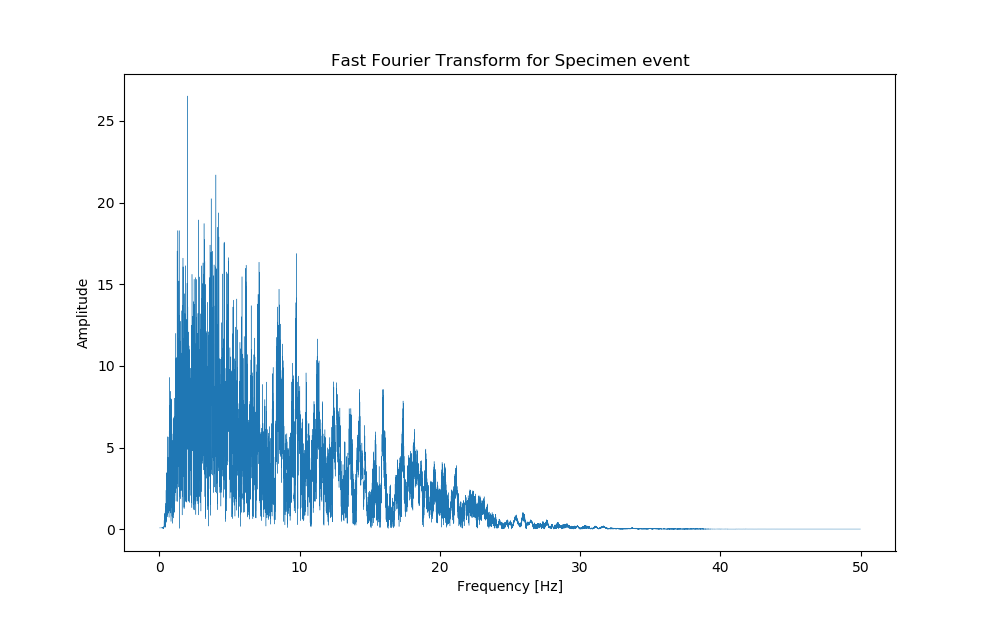

In [52]:
fft_df = input_df.copy()

y_values = np.fft.fft(input_df.Amplitude.values)

no_of_datapoints = len(y_values)
time_interval = 0.01 #constant sample interval for all of the seismometers used

yf_values = 2.0/no_of_datapoints * np.abs(y_values[:no_of_datapoints//2])

x_values = fftfreq(no_of_datapoints, d=time_interval)
xf_values = fftfreq(no_of_datapoints, d=time_interval)[:no_of_datapoints//2]

fig, ax = plt.subplots()
ax.plot(xf_values, yf_values, lw=0.3)
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Amplitude")
ax.set_title("Fast Fourier Transform for Specimen event")
plt.show()

<IPython.core.display.Javascript object>


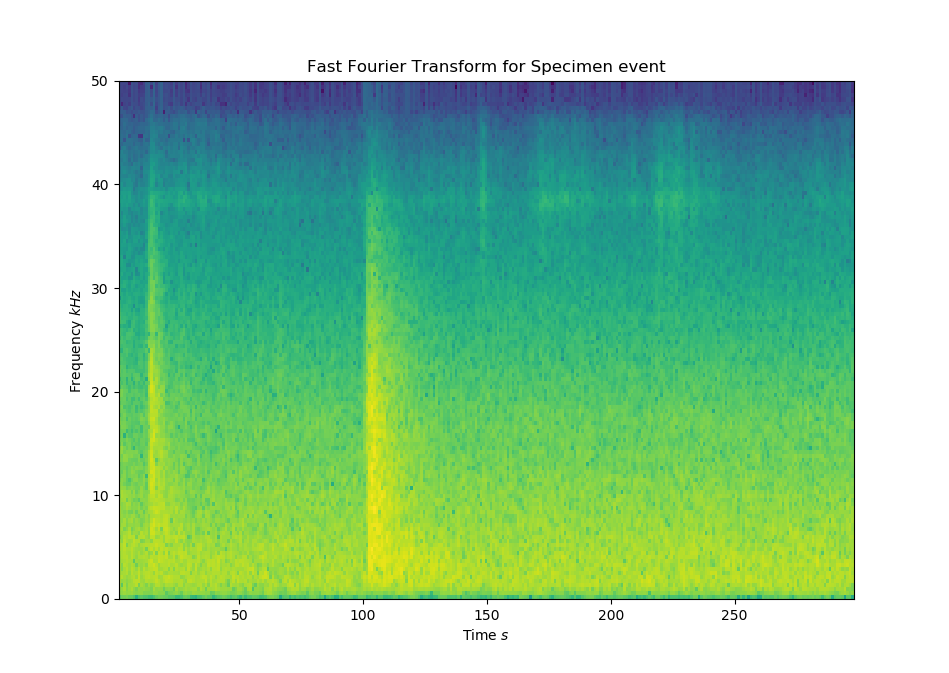

Text(0.5, 1.0, 'Fast Fourier Transform for Specimen event')

In [63]:
window_size = 256

recording_rate = 100

frequencies, times, amplitudes = signal.spectrogram(input_df.Amplitude.values, fs = recording_rate, window='hanning', nperseg = window_size, noverlap= window_size - 100, detrend= False, scaling="spectrum")

decibels = 20 * np.log10(amplitudes)

f, ax = plt.subplots()
ax.pcolormesh(times, frequencies, decibels, cmap="viridis")
ax.set_ylabel("Frequency $kHz$")
ax.set_xlabel("Time $s$")
ax.set_title("Fast Fourier Transform for Specimen event")